**Final Project Submission**
Please fill out:

* Student name: Lawrence Chew, Laura Shummon Maass, Mando Iwanaga
* Student pace: self paced / part time / **full time**
* Scheduled project review date/time: 4/18/2019
* Instructor name: Miles Erickson, Greg Damico
* Blog post URL: https://medium.com/@mandoiwanaga08/feature-selection-4af9b5efb044

# Project Overview
* The data set is based on King County Housing sales data.
* The goal of the project is to predict housing prices based on best fit features through linear regression.
* Feature selection is based on best K-Folds Cross Validation results.


# Perform Exploratory Data Analysis

In [44]:
#load necessary modules
#write down more details about mission trying to accomplish, data evaluated, metric of choice
#project headers to give overview to break up sections

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Imported Data

In [45]:
df = pd.read_csv('kc_house_data.csv')

## Explore Data

In [46]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [47]:
len(df)

21597

## Data Cleaning

In [48]:
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df.isna().sum()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [50]:
df[df['sqft_basement'] == '?'] = np.nan
df['sqft_basement'] = df['sqft_basement'].map(float)

In [51]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [52]:
df.isna().sum()

id                454
date              454
price             454
bedrooms          454
bathrooms         454
sqft_living       454
sqft_lot          454
floors            454
waterfront        454
view              454
condition         454
grade             454
sqft_above        454
sqft_basement     454
yr_built          454
yr_renovated     4208
zipcode           454
lat               454
long              454
sqft_living15     454
sqft_lot15        454
dtype: int64

In [53]:
df = df.dropna(subset=['id'])

In [54]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Adding potentially useful independant variables

In [55]:
seattle_zips = pd.read_csv('seattle_zips.csv')
df_test = pd.merge(df, seattle_zips, how = 'left', left_on = 'zipcode', right_on = 'Zip')

In [56]:
df_1 = df_test.drop('Title', axis = 1)
df_2 = df_1.drop('Unnamed: 2', axis = 1)
df_3 = df_2.drop('Unnamed: 3', axis = 1)
df = df_3

In [57]:
df['Test'] = df['Zip'].fillna(0)
df['Seattle Zip'] = df['Test'].apply(lambda x: 0 if x == 0 else 1)

df_4 = df.drop('Test', axis=1)
df_5 = df_4.drop('Zip', axis=1)
df = df_5

In [58]:
df.head()  #Seattle Zip = 1  --> MEANS the zip code is in Seattle

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Seattle Zip
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,1
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,1
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,770.0,0.0,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0,0
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,1
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,0


In [59]:
datetime = pd.to_datetime(df['date'], format='%m/%d/%Y')
month = datetime.dt.month
year = datetime.dt.year

In [60]:
df['month'] = month  #Month of Sale
df['year'] = year    #Year of Sale
df.head(10) 


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Seattle Zip,month,year
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,1,10,2014
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,1,12,2014
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0,0,2,2015
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,1,12,2014
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,0,2,2015
5,7.237550e+09,5/12/2014,1230000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,...,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930.0,0,5,2014
6,2.008000e+09,1/15/2015,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0.0,...,1963.0,0.0,98198.0,47.4095,-122.315,1650.0,9711.0,1,1,2015
7,2.414600e+09,4/15/2015,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,...,1960.0,0.0,98146.0,47.5123,-122.337,1780.0,8113.0,1,4,2015
8,3.793500e+09,3/12/2015,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,...,2003.0,0.0,98038.0,47.3684,-122.031,2390.0,7570.0,0,3,2015
9,1.736801e+09,4/3/2015,662500.0,3.0,2.50,3560.0,9796.0,1.0,0.0,0.0,...,1965.0,0.0,98007.0,47.6007,-122.145,2210.0,8925.0,0,4,2015


In [61]:
df['house_age'] = df.apply(lambda x: int(x['year'] - x['yr_built']), axis = 1)
df.head(10)  #Added house_age in years

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Seattle Zip,month,year,house_age
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,1,10,2014,59
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,1,12,2014,63
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,NaN,98028.0,47.7379,-122.233,2720.0,8062.0,0,2,2015,82
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,1,12,2014,49
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,0,2,2015,28
5,7.237550e+09,5/12/2014,1230000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,...,0.0,98053.0,47.6561,-122.005,4760.0,101930.0,0,5,2014,13
6,2.008000e+09,1/15/2015,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0.0,...,0.0,98198.0,47.4095,-122.315,1650.0,9711.0,1,1,2015,52
7,2.414600e+09,4/15/2015,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,...,0.0,98146.0,47.5123,-122.337,1780.0,8113.0,1,4,2015,55
8,3.793500e+09,3/12/2015,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,...,0.0,98038.0,47.3684,-122.031,2390.0,7570.0,0,3,2015,12
9,1.736801e+09,4/3/2015,662500.0,3.0,2.50,3560.0,9796.0,1.0,0.0,0.0,...,0.0,98007.0,47.6007,-122.145,2210.0,8925.0,0,4,2015,50


In [62]:
df['sqft_living_relative15'] = df['sqft_living']/df['sqft_living15']
df['sqft_lot_relative15'] = df['sqft_lot']/df['sqft_lot15']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,Seattle Zip,month,year,house_age,sqft_living_relative15,sqft_lot_relative15
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,47.5112,-122.257,1340.0,5650.0,1,10,2014,59,0.880597,1.000000
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,47.7210,-122.319,1690.0,7639.0,1,12,2014,63,1.520710,0.948030
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,47.7379,-122.233,2720.0,8062.0,0,2,2015,82,0.283088,1.240387
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,47.5208,-122.393,1360.0,5000.0,1,12,2014,49,1.441176,1.000000
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,47.6168,-122.045,1800.0,7503.0,0,2,2015,28,0.933333,1.076903


## Generate Correlation Matrix

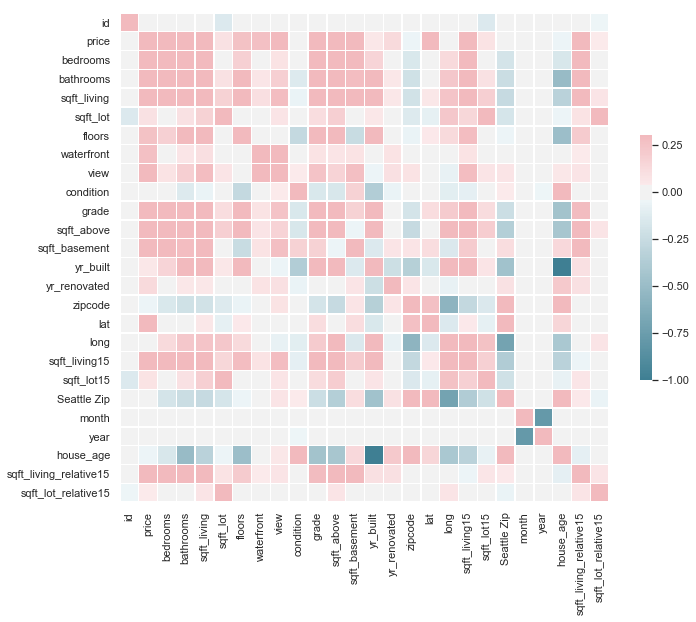

In [63]:
import seaborn as sns

sns.set(style='white')
corr = df.corr()
mask = np.zeros_like(corr,dtype=np.bool)

fig, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidth=.5,cbar_kws={'shrink':.5})

**Dropping longitude, latitude, and year renovated. Longitude and latitude highly correlated with zip codes. Dropped year renovated due to uncertainty around accuracy. Micro renovations over time likely not included.**

In [64]:
df = df.drop(['long'], axis = 1)   
df = df.drop(['lat'], axis = 1)
df = df.drop(['yr_renovated'], axis = 1)
df.head().T

,0,1,2,3,4
id,7.1293e+09,6.4141e+09,5.6315e+09,2.4872e+09,1.9544e+09
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


# Normalizing the Data

**Analyzing data prior to normalization.**

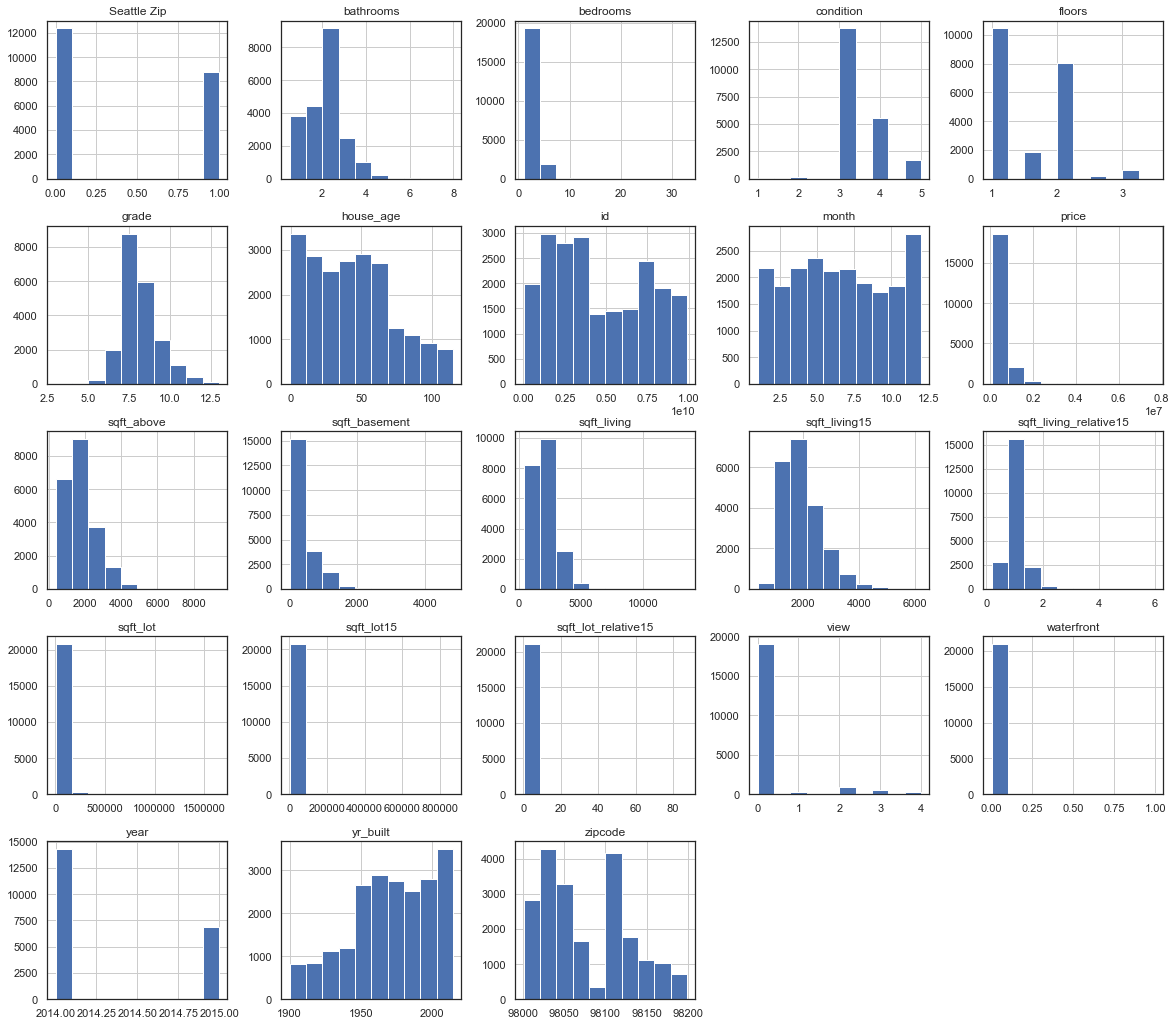

In [65]:
df.hist(figsize=(20,18));

**Normalization Process**

In [66]:
# may want to address nulls prior
# may want to create one hot encoding for possible categorical columns
#standardize data
df_norm = df.copy()
for i in df.columns:
    if i == 'date':
        pass
    elif i == 'price':
        df_norm[i] = np.log(df_norm[i])
    else:
        #df_norm[i] = (df_norm[i] - df_norm[i].mean())/df_norm[i].std()
        df_norm[i] = (df_norm[i] - df_norm[i].mean())/(df_norm[i].max() - df_norm[i].min())
        

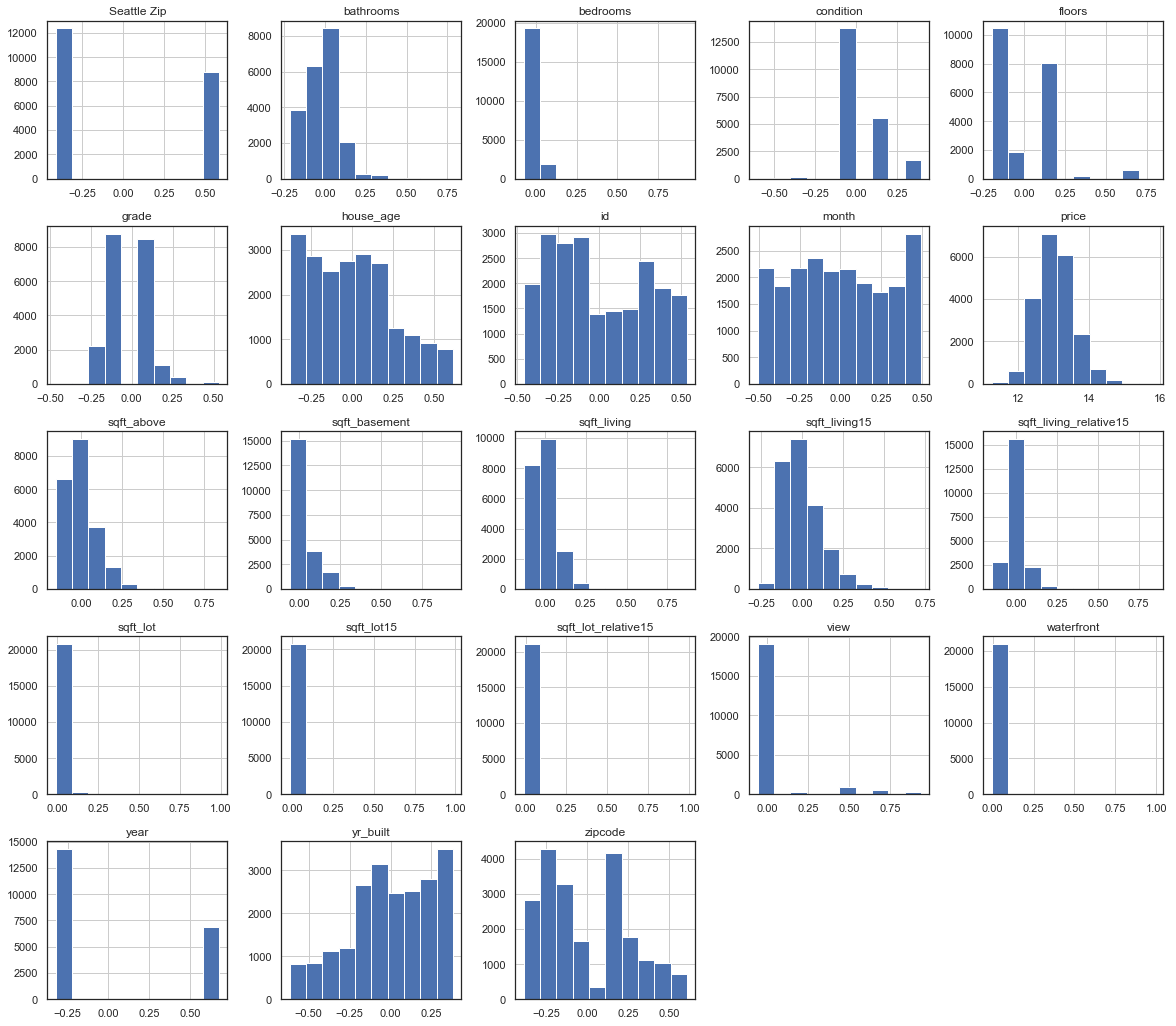

In [67]:
df_norm.hist(figsize = (20, 18));
# checking normalization of data

# Graph Linear Regression Joint Plots

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


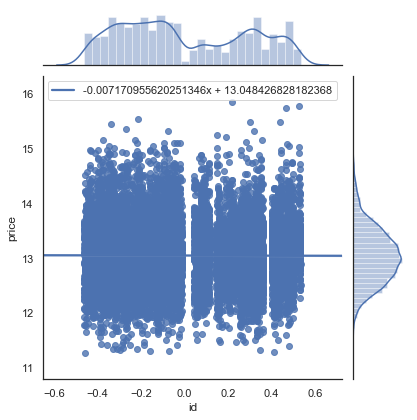

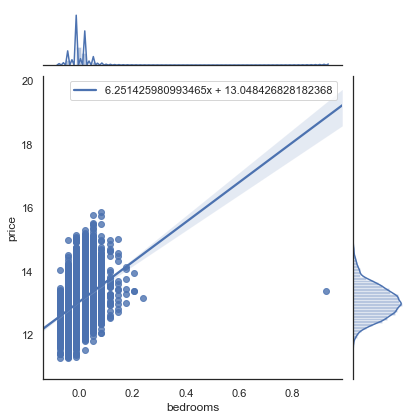

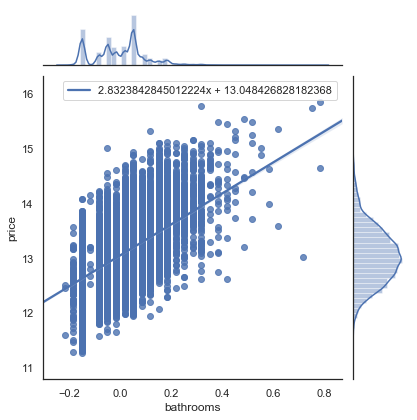

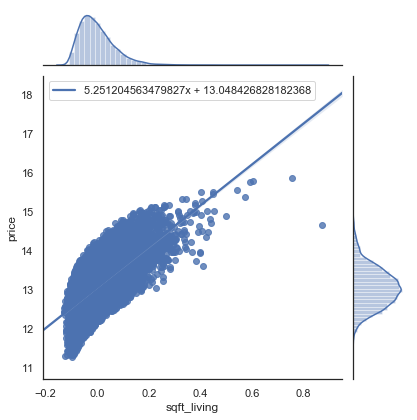

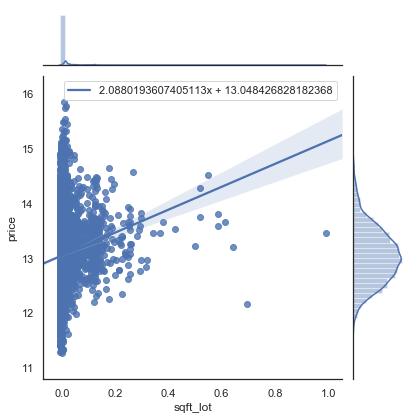

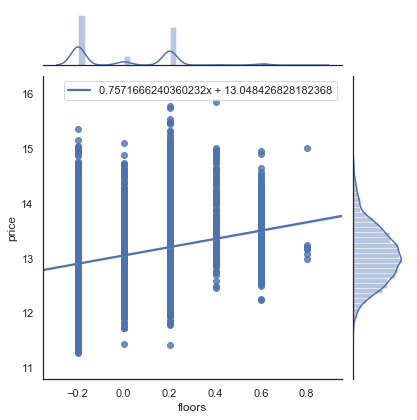

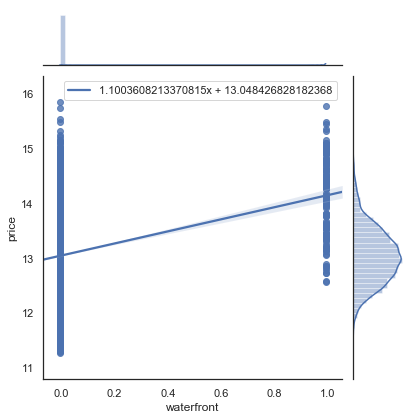

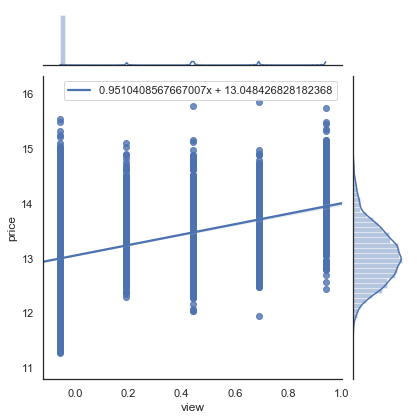

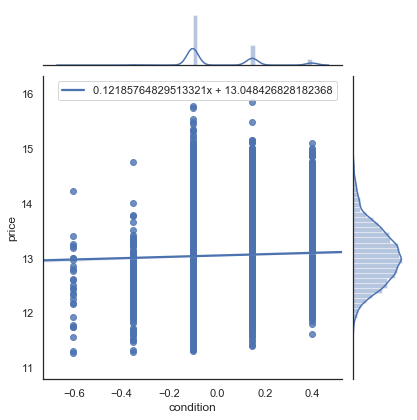

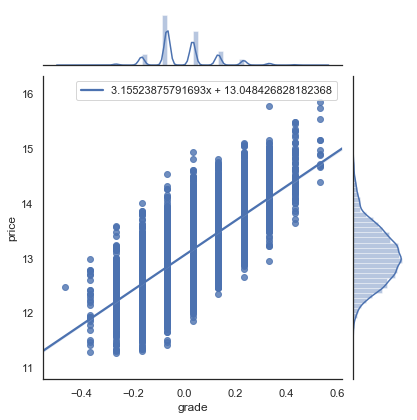

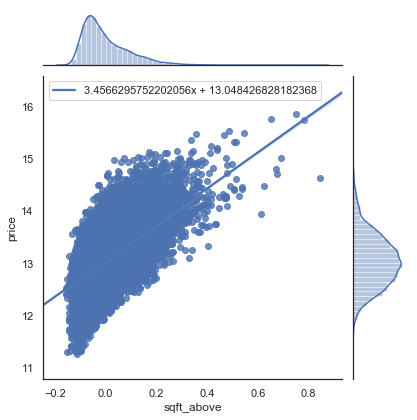

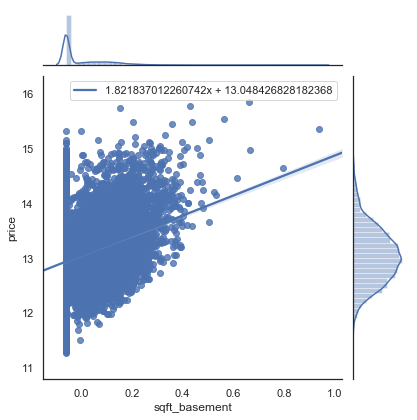

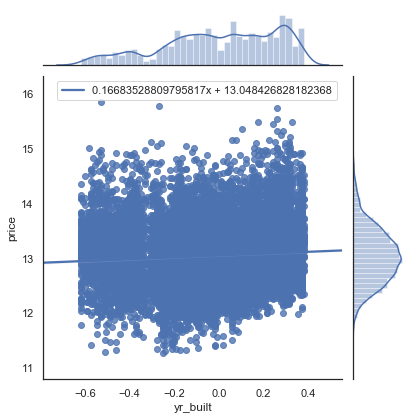

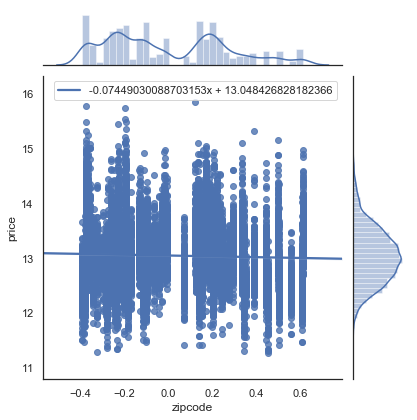

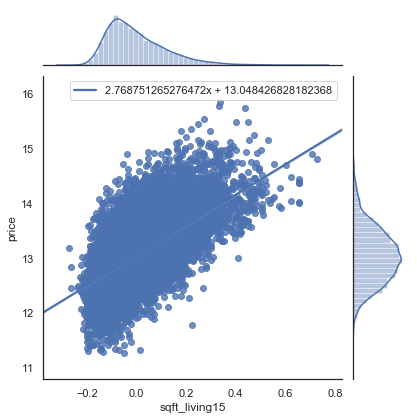

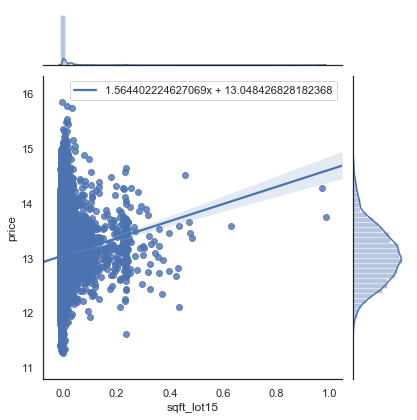

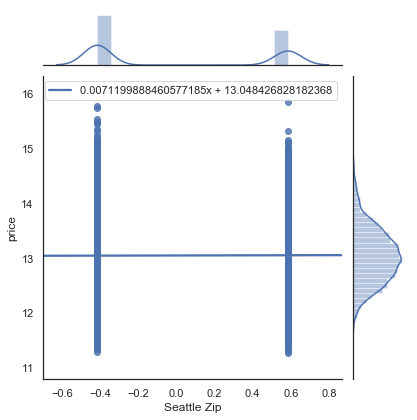

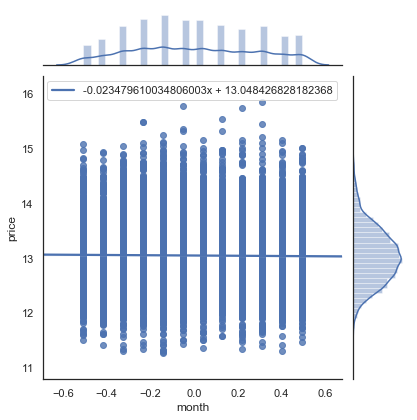

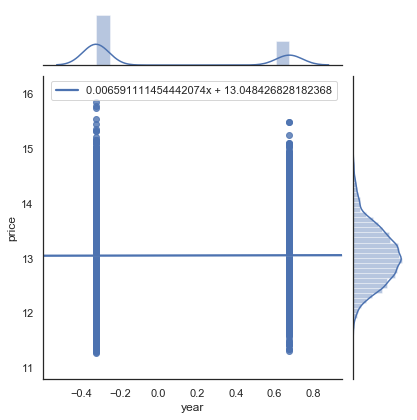

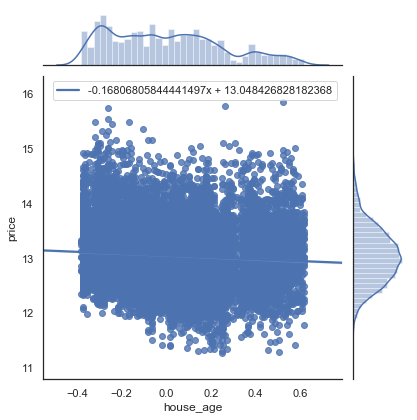

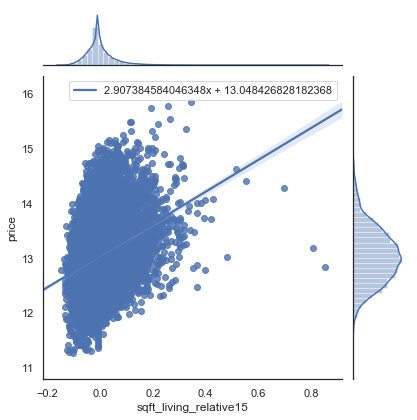

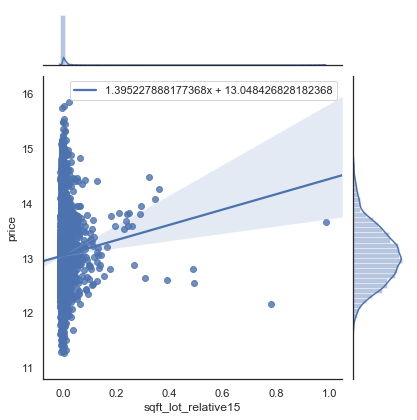

In [68]:
from scipy import stats
for i in df_norm.columns:
    if i == 'price' or i == 'date':
        pass
    else:
        slope, intercept, r_value, p_value, std_err = stats.linregress(df_norm[i],df_norm['price'])
        sns.jointplot(x=df_norm[i], y=df_norm['price'], data=df_norm, kind='reg',
                      line_kws={'label':f'{slope}x + {intercept}'})
        plt.legend()
        plt.show()
        

# Generate Linear Model

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import math


def model_generation(var1, var2, var3):
    """Function to generate the three models we use to compare against."""
    X = df_norm[[var1, var2, var3]]
    y = df_norm['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
    model.fit(X_train, y_train)
    
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test
    
    #Difference between Training mean squared error and Testing mean squared error is minimal.
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    print(train_mse)
    print(test_mse)
    
    #Iterate through test  sizes to find best training/test size split.
    train_error = []
    test_error = []
    mean_train_error = []
    mean_test_error = []
    test_sizes = list(range(5,95,10))
    
    for i in test_sizes:
        for n in range(0,100):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100)
            model.fit(X_train, y_train)
            y_hat_train = model.predict(X_train)
            y_hat_test = model.predict(X_test)
            train_error.append(mean_squared_error(y_train, y_hat_train))
            test_error.append(mean_squared_error(y_test, y_hat_test))
        mean_train_error.append(np.mean(train_error))
        mean_test_error.append(np.mean(test_error))
    
    fig, ax = plt.subplots()
    
    ax.scatter(test_sizes, mean_train_error, label = 'Training Error')
    ax.scatter(test_sizes, mean_test_error, label = 'Testing Error')
    ax.set_xlabel('Test Size')
    ax.set_ylabel('MSE')
    ax.set_title('MSE by Test Sizes')
    ax.legend()
    #Difference found to be minimal
    
    #K-folds Cross Validation
    cv_20_results = cross_val_score(model,X,y,cv=20,scoring='neg_mean_squared_error')
    X = list(range(1,21))
    y = cv_20_results
    return cv_20_results
#     ax_cvs.scatter(X,y)
#     plt.xticks(X)

In [71]:
def model_plotter(model1, model2, model3, model1_label, model2_label, model3_label):
    """Function to plot the three models for comparison between the effect of different independent variables."""
    fig, ax = plt.subplots()
    X = list(range(1,21))
    ax.scatter(X,model1, label=model1_label)
    ax.scatter(X, model2, label=model2_label)
    ax.scatter(X, model3, label=model3_label)
    ax.set_xlabel('K-Fold Iteration')
    ax.set_ylabel('Neg. MSE')
    plt.xticks(X)
    plt.title('K-Fold Iteration by Neg. MSE')
    plt.legend()
    #plt.savefig(fname='cvsfile.png',bbox_inches='tight')

## Generate Visual Graph of K-Folds Cross Validation Scores

0.13265213023704336
0.13290679538617076
0.12038617315904504
0.12255443946941585
0.13577790604327128
0.13111384527218836


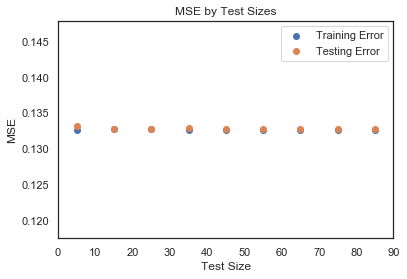

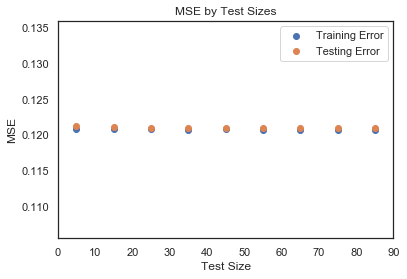

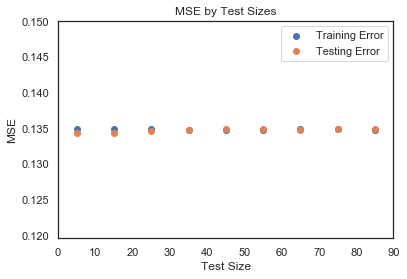

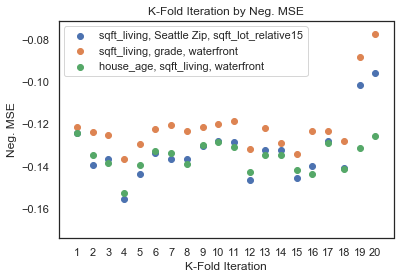

In [72]:
model_plotter(model_generation('sqft_living', 'Seattle Zip', 'sqft_lot_relative15', ), 
              model_generation('sqft_living', 'grade', 'waterfront'), 
              model_generation('house_age', 'sqft_living','waterfront'), 
              'sqft_living, Seattle Zip, sqft_lot_relative15',
             'sqft_living, grade, waterfront','house_age, sqft_living, waterfront')

## Graph individual independant variables by target variable

In [73]:
first_ind = 'sqft_living'
second_ind = 'grade'
third_ind = 'waterfront'
X = df_norm[[first_ind, second_ind, third_ind]]
y = df_norm['price']

In [74]:
from numpy.polynomial.polynomial import polyfit
from mpl_toolkits import mplot3d
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35)
var_first_ind, var_second_ind, var_third_ind = np.split(X_test,3,axis=1)
model.fit(X_train, y_train)
    
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
ls_vars = [var_first_ind, var_second_ind, var_third_ind]
ls_str_vars = [str(first_ind), str(second_ind), str(third_ind)]

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


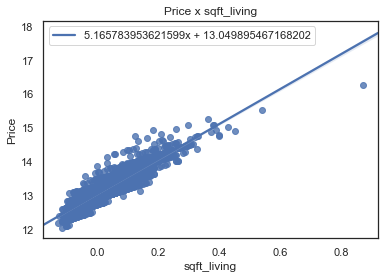

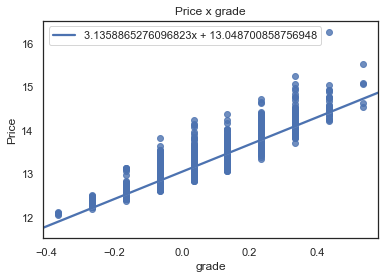

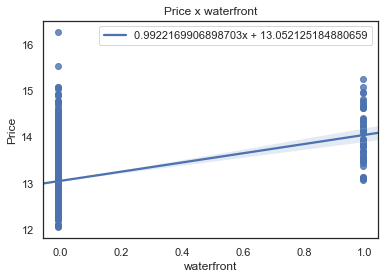

In [75]:
for var, str_var in zip(ls_vars, ls_str_vars):
    arr_var = np.array(var)
    arr_var = np.reshape(arr_var,len(arr_var))

    slope, intercept, r_value, p_value, std_err = stats.linregress(arr_var, y_hat_test)
    fig = sns.regplot(x=var, y=y_hat_test, data=df_norm, line_kws={'label':f'{slope}x + {intercept}'})
    fig.legend()
    fig.set_xlabel(str_var)
    fig.set_ylabel('Price')
    fig.set_title('Price x ' + str_var)
    plt.show();
    

## Prepare data for regression analysis

In [76]:
df_narrow = df_norm[[first_ind, second_ind, third_ind]]

In [77]:
import statsmodels.formula.api as smf

In [78]:
col_names = X
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

# Individual Regression Analysis of Features

In [79]:
for idx, val in enumerate(col_names):
    print('Housing Price ~ ' + val)
    print('----------------------------')
    formula = 'price~' + val
    model = smf.ols(formula=formula, data=df_norm).fit()
    x_new = pd.DataFrame({val:[df_norm[val].min(), df_norm[val].max()]})
    predictions = model.predict(x_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[idx+1])
    print(predictions)
    print(model.summary())

Housing Price ~ sqft_living
----------------------------
['sqft_living', 0.48361332061495443, 13.048426828182365, 5.25120456347983, 0.0]
0    12.366240
1    17.617445
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                 1.980e+04
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:38:56   Log-Likelihood:                -9456.3
No. Observations:               21143   AIC:                         1.892e+04
Df Residuals:                   21141   BIC:                         1.893e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    st

# Multiple Regression Analysis

In [80]:
import statsmodels.api as sm
X_int_sm = sm.add_constant(df_narrow)
model = sm.OLS(df_norm['price'], X_int_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     9130.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:38:56   Log-Likelihood:                -7657.5
No. Observations:               21143   AIC:                         1.532e+04
Df Residuals:                   21139   BIC:                         1.535e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0484      0.002   5458.155      0.000      13.044      13.053
sqft_living     2.7929      0.053     52.545      0.000       2.689       2.897
grade           1.8530      0.032     58.822      0.000       1.791       1.915
waterfront      0.6248      0.029     21.224      0.000       0.567       0.682
==============================================================================
Omnibus:                       42.253   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.895
Skew:                           0.081   Prob(JB):                     2.17e-09
Kurtosis:                       2.862   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Run Multiple Linear Regression on Selected Features and Calc Price from User Inputs

In [81]:
model = LinearRegression()

In [82]:
model.fit(df_narrow, df_norm['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
print(model.coef_)
print(model.intercept_)

[2.79287512 1.85304189 0.62475626]
13.048426828182368


In [90]:
def calc_price(input_features, str_features, intercept=model.intercept_, model_coefs=model.coef_):
    """Function to calculate the price of a home based on selected features."""
    final_price = []
    #for loop to create price estimate
    for feature, coef, str_feature in zip(input_features, model_coefs, str_features):
        #normalize feature
        #norm_feat = (feature - np.mean(df[str_feature]))/df[str_feature].std()
        norm_feat = (feature - df[str_feature].mean())/(df[str_feature].max() - df[str_feature].min())
        #append feature times coefficient to list to sum
        
        #final_price.append(norm_feat * coef)
        scaled_feat = norm_feat * coef
        revert_feat = (scaled_feat * (df_norm[str_feature].max() - df_norm[str_feature].min()) + 
                       df_norm[str_feature].mean())
        final_price.append(revert_feat)
    
    final_price.append(intercept)
    print(sum(final_price))
    return np.exp(sum(final_price))

**Predict Price based on features**

In [91]:
input_features = [1000, 7, 1]
str_features = [first_ind, second_ind, third_ind]
print(calc_price(input_features,str_features))

13.317781464315395
607909.5991685075
